<a href="https://colab.research.google.com/github/vcanalesp/portafolio/blob/main/docs/projects/DataScience/02_numpy/numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Regresión Líneal - Numpy




El objetivo de este laboratorio es aplicar un modelo de regresión lineal simple. 

### Definición 
El **modelo de regresión lineal general** o **modelo de regresión multiple**,  supone que, 
$\boldsymbol{Y} =  \boldsymbol{X}\boldsymbol{\beta} + \boldsymbol{\epsilon},$ donde:

* $\boldsymbol{X} = (x_1,...,x_n)^{T}$: variable explicativa
* $\boldsymbol{Y} = (y_1,...,y_n)^{T}$: variable respuesta
* $\boldsymbol{\epsilon} = (\epsilon_1,...,\epsilon_n)^{T}$: error se asume un ruido blanco, es decir, $\epsilon \sim \mathcal{N}( \boldsymbol{0},\sigma^2I)$
* $\boldsymbol{\beta} = (\beta_1,...,\beta_n)^{T}$: coeficientes de regresión.


La idea es tratar de establecer la relación entre las variables independientes y dependientes por medio de ajustar el mejor hyper plano con respecto a los puntos. 

Por ejemplo, para el caso de la **regresión lineal simple**, se tiene la siguiente estructura: $y_i=\beta_0+\beta_1x_i+\epsilon_i.$ En este caso, la regresión lineal corresponderá a la recta que mejor pasa por los puntos observados.

<img src="https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/docs/lectures/ml/analisis_supervisado_regresion/images/lr.webp" width="560" height="480" align="center"/>

Existen algunas situaciones donde los modelos lineales no son apropiados:

* El rango de valores de $Y$ está restringido (ejemplo: datos binarios o de conteos).
* La varianza de $Y$ depende de la media.

### Mejores parémetros: Método de minimos cudrados

El **método de mínimos cudrados** es un método de optimización que busca encontrar la mejor aproximación mediante la minimización de los residuos al cuadrado, es decir, se buscar encontrar:

$$(P)\ \min \sum_{i=1}^n e_{i}^2 =\sum_{i=1}^n (y_{i}-f_{i}(x;\beta))^2   $$

Para el caso de la regresión lineal simple, se busca una función $$f(x;\beta) = \beta_{0} + \beta_{1}x,$$

por lo tanto el problema que se debe resolver es el siguiente:

$$(P)\ \min \sum_{i=1}^n e_{i}^2 =\dfrac{1}{n}\sum_{i=1}^{n}\left ( y_{i}-(\beta_{0} + \beta_{1}x_{i})\right )^2$$ 

Lo que significa, que para este problema, se debe encontrar $\beta = (\beta_{0},\beta_{1})$ que minimicen el problema de optimización. En este caso la solución viene dada por:

$$\hat{\beta}_{1} = \dfrac{\sum(x-\bar{x})(y-\bar{y})}{\sum(x-\bar{x})^2} = \rho (x,y)\ ; \  \hat{\beta}_{0} = \bar{y}-\hat{\beta}_{1} \bar{x} $$

### Selección de modelos

**R-cuadrado**  



El [coeficiente de determinación](https://en.wikipedia.org/wiki/Coefficient_of_determination) o **R-cuadrado** ($r^2$ ) , es un estadístico usado en el contexto de un modelo estadístico cuyo principal propósito es predecir futuros resultados o probar una hipótesis. El coeficiente determina la calidad del modelo para replicar los resultados, y la proporción de variación de los resultados que puede explicarse por el modelo.

El valor del $r^2$ habitualmente entre 0 y 1, donde 0 significa una mala calidad de ajuste en el modelo y 1 corresponde a un ajuste lineal perfecto. A menudo, este estadístico es ocupado para modelos lineales.  

Se define por la fórmula:


$$r^2 = \dfrac{SS_{reg}}{SS_{tot}} = 1 - \dfrac{SS_{res}}{SS_{tot}},$$

donde:

* **$SS_{reg}$** ( suma explicada de cuadrados (ESS)): $\sum_{i}(\hat{y}-\bar{y})^2$


* **$SS_{res}$**: ( suma residual de cuadrados (RSS)): $\sum_{i}(y_{i}-\hat{y})^2 = \sum_{i}e_{i}^2$


* **$SS_{tot}$**: ( varianza): $\sum_{i}(y_{i}-\bar{y})$, donde: $SS_{tot}=SS_{reg}+SS_{res}$


En una forma general, se puede ver que $r^2$ está relacionado con la fracción de varianza inexplicada (FVU), ya que el segundo término compara la varianza inexplicada (varianza de los errores del modelo) con la varianza total (de los datos).



<img src="https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/docs/lectures/ml/analisis_supervisado_regresion/images/r2.png" width="480" height="360" align="rigt"/>


* Las áreas de los cuadrados azules representan los residuos cuadrados con respecto a la regresión lineal ($SS_{tot}$). 

* Las áreas de los cuadrados rojos representan los residuos al cuadrado con respecto al valor promedio ($SS_{res}$).



## Error de un modelo

### Definición

El **error** corresponde a la diferencia entre el valor original y el valor predicho,es decir:

$$e_{i}=y_{i}-\hat{y}_{i} $$


<img src="https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/docs/lectures/ml/analisis_supervisado_regresion/images/error.png" width="480" height="360" align="rigt"/>


### Formas de medir el error de un modelo

Para medir el ajuste de un modelo se ocupan las denominadas **funciones de distancias** o **métricas**. Existen varias métricas, dentro de las cuales encontramos:




1. **Métricas absolutas**: Las métricas absolutas o no escalada miden el error sin escalar los valores. Las métrica absolutas más ocupadas son:

    *  **Mean Absolute Error** (MAE)

    $$\textrm{MAE}(y,\hat{y}) = \dfrac{1}{n}\sum_{t=1}^{n}\left | y_{t}-\hat{y}_{t}\right |$$

    *  **Mean squared error** (MSE):

    $$\textrm{MSE}(y,\hat{y}) =\dfrac{1}{n}\sum_{t=1}^{n}\left ( y_{t}-\hat{y}_{t}\right )^2$$





2. **Métricas Porcentuales**: Las métricas porcentuales o escaladas miden el error de manera escalada, es decir, se busca acotar el error entre valores de 0 a 1, donde 0 significa que el ajuste es perfecto, mientras que 1 sería un mal ajuste. Cabe destacar que muchas veces las métricas porcentuales puden tener valores mayores a 1.Las métrica Porcentuales más ocupadas son:

    * **Mean absolute percentage error** (MAPE):
    
    $$\textrm{MAPE}(y,\hat{y}) = \dfrac{1}{n}\sum_{t=1}^{n}\left | \frac{y_{t}-\hat{y}_{t}}{y_{t}} \right |$$

    * **Symmetric mean absolute percentage error** (sMAPE):
    
    $$\textrm{sMAPE}(y,\hat{y}) = \dfrac{1}{n}\sum_{t=1}^{n} \frac{\left |y_{t}-\hat{y}_{t}\right |}{(\left | y_{t} \right |^2+\left | \hat{y}_{t} \right |^2)/2}$$

## Problema a resolver

En este artículo, utilizaremos un conjunto de datos de **salarios**. Nuestro conjunto de datos tendrá 2 columnas:

* años de experiencia (YearsExperience) - variable explicativa
* salario (Salary) - variable de respuesta

A coninuación, mostramos explícitamente el conjunto de datos.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Latex

YearsExperience = np.array([
 1.1,1.3,1.5,2.0,2.2,
 2.9,3.0,3.2,3.2,3.7,
 3.9,4.0,4.0,4.1,4.5,
 4.9,5.1,5.3,5.9,6.0,
 6.8,7.1,7.9,8.2,8.7,
 9.0,9.5,9.6,10.3,10.5
 ])

Salary =  np.array([
 39343.0,46205.0,37731.0,43525.0,39891.0,
 56642.0,60150.0,54445.0,64445.0,57189.0,
 63218.0,55794.0,56957.0,57081.0,61111.0,
 67938.0,66029.0,83088.0,81363.0,93940.0,
 91738.0,98273.0,101302.0,113812.0,109431.0,
 105582.0,116969.0,112635.0,122391.0,121872.0
])


Buscamos encontrar la regresión lineal simple:

$$Salary_i=\beta_0+\beta_1YearsExperience_i+\epsilon_i$$

Para esto debe resolver las siguientes preguntas:

1. Defina la función `estimate_coef(x,y)` para encontrar los coeficientes de regresión lineal $b = (b_0,b_1)$.

In [2]:
def estimate_coef(x, y):
    """
    Encontrar los coeficientes del modelo de 
    regresion lineal: beta = (beta_0,beta_1)
    """
    
    # beta 1
    prom_x = np.sum(x)/x.size
    prom_y = np.sum(y)/y.size
    x = x - prom_x
    y = y - prom_y
    num = np.sum(x*y)
    den = np.sum(x*x)
    beta_1 = num/den
    
    # beta 0
    beta_0 = prom_y - beta_1*prom_x
    
    return (beta_0, beta_1)

In [3]:
# imprimir valores del beta estimado
beta_estimado = estimate_coef(YearsExperience, Salary)
print(f"Coeficientes estimados:\nb_0 = {beta_estimado[0]} \nb_1 = {beta_estimado[1]}")

Coeficientes estimados:
b_0 = 25792.20019866869 
b_1 = 9449.962321455077


2. Grafique su solución ocupando la función `plot_regression_line(x,y,yhat)`.

In [4]:
def plot_regression_line(x, y, yhat):
    plt.figure(figsize=(10,4))
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",marker = "o", s = 30)


    # plotting the regression line
    plt.plot(x, yhat, color = "g")

    # putting labels
    plt.xlabel('YearsExperience')
    plt.ylabel('Salary')
    plt.title("Plot YearsExperience vs Salary")
    
    # function to show plot
    plt.show()

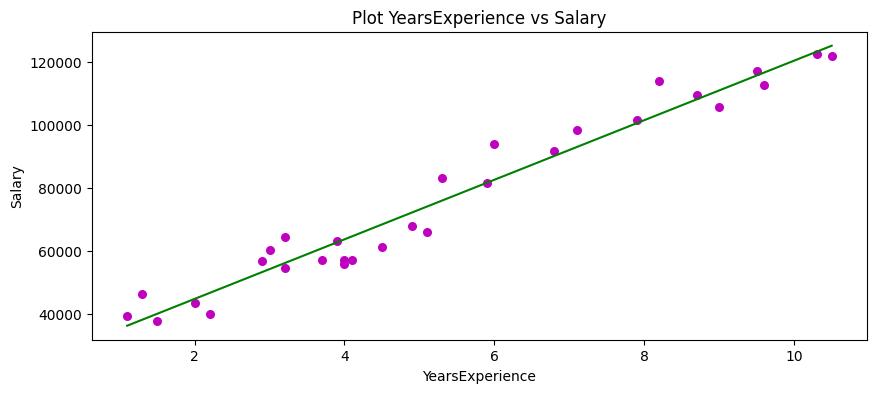

In [5]:
# mostrar resultados del ajuste lineal
prediccion = beta_estimado[0] + beta_estimado[1]*YearsExperience
plot_regression_line(YearsExperience, Salary, prediccion)

3. Calcule el estadístico **r-cuadrado** ($r^2$) y las siguientes métricas de error:
    * mae
    * rmse
    * mape
    * smape

In [6]:
def mae(targets, predictions) -> float:
    """
    Calculo de la metrica: mean absolute error (MAE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets
    return round(np.abs(error).mean(), 4)

In [7]:
def rmse(targets, predictions) -> float:
    """
    Calculo de la metrica: root mean squared error (RMSE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets
    return round(np.sqrt((error ** 2).mean()), 4)

In [8]:
def mape(targets, predictions) -> float:
    """
    Calculo de la metrica: mean absolute percentage error (MAPE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets

    if any(x == 0 for x in targets):
        return np.inf
    else:
        return round(np.abs(error / targets).mean(),4)

In [9]:
def smape(y, yhat) -> float:
    """
    Calculo de la metrica: symmetric mean absolute percentage error (SMAPE)
    """
    # agregar codigo 
    metrica = 0
    return metrica

In [13]:
def smape(targets, predictions) -> float:
    """
    Calculo de la metrica: symmetric mean absolute percentage error (SMAPE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets
    sum_values = np.abs(predictions) + np.abs(targets)

    if any(x == 0 for x in sum_values):
        return np.inf
    else:
        return round(2 * np.mean(np.abs(error) / sum_values),4)

In [14]:
def rsquared(y, yhat) -> float:
    """
    Calculo del r-cuadrado
    """
    prom = np.sum(y)/y.size
    ss_res = np.sum((y-yhat)**2)
    ss_tot = np.sum((y-prom)**2)
    metrica = 1- ss_res/ss_tot
    return metrica

In [15]:
# calcular resultados
calcular_mae = round(mae(Salary,prediccion), 4)
calcular_rmse = round(rmse(Salary,prediccion), 4)
calcular_mape = round(mape(Salary,prediccion), 4)
calcular_smape = round(smape(Salary,prediccion), 4)
calcular_rsquared = round(rsquared(Salary,prediccion), 4)

In [16]:
# imprimir resultados
print(f"mae:   {calcular_mae}")
print(f"rmse:  {calcular_rmse}")
print(f"mape:  {calcular_mape}")
print(f"smape: {calcular_smape}")
print(f"r^2:   {calcular_rsquared}")

mae:   4644.2013
rmse:  5592.0436
mape:  0.0705
smape: 0.0704
r^2:   0.957


4. Conclusiones del caso de estudio (evaluar si la regresión lineal se ajusta correctamente a los datos o no). 

**Respuesta**:  A partir de las métricas calculadas se puede considerar la regresión lineal como un ajuste adecuado para el modelo. En efecto, se tiene que el coeficiente $r^2$ es cercano a 1, mientras que los errores porcentuales se encuentran debajo del 10%.